In [2]:
import os
print(os.getcwd())

c:\Users\fenan\OneDrive\Desktop\MSc DATA SCIENCE 22-23\Final Thesis


In [7]:
import numpy as np
import pandas as pd

df = pd.read_excel("Potential Datasets\stack-overflow-developer-survey-2022\survey_results_public3.0.xlsx")
#df.sample(5)

In [17]:
print("the number of columns = ", df.columns.value_counts().sum())
print("the number of rows = ", df.index.max())

the number of columns =  81
the number of rows =  73267


In [298]:
#df.info()

In [299]:
"""interesting_cols = ['Employment','RemoteWork','CodingActivities','EdLevel', 'LearnCodeCoursesCert', 'DevType', 'OrgSize',
                   'Country','Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                    'Accessibility', 'MentalHealth',  'WorkExp', 'ConvertedCompYearly' ]"""

In [31]:
interesting_cols = ['Employment','RemoteWork','CodingActivities','YearsCode','EdLevel', 'LearnCodeCoursesCert', 'DevType', 'OrgSize',
                   'Country','Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                    'Accessibility', 'MentalHealth',  'WorkExp', 'ConvertedCompYearly' ]
cols_to_use = [i for i in enumerate (interesting_cols)]

cols_to_use


[(0, 'Employment'),
 (1, 'RemoteWork'),
 (2, 'CodingActivities'),
 (3, 'YearsCode'),
 (4, 'EdLevel'),
 (5, 'LearnCodeCoursesCert'),
 (6, 'DevType'),
 (7, 'OrgSize'),
 (8, 'Country'),
 (9, 'Age'),
 (10, 'Gender'),
 (11, 'Trans'),
 (12, 'Sexuality'),
 (13, 'Ethnicity'),
 (14, 'Accessibility'),
 (15, 'MentalHealth'),
 (16, 'WorkExp'),
 (17, 'ConvertedCompYearly')]

In [18]:
for col in df.columns:
    if col not in interesting_cols:
        df = df.drop([col], axis=1)

## Punto de guardado

In [20]:
# First save

df.to_csv('1cleanST-OV.csv', index=False)

In [52]:
df1 = pd.read_csv('1cleanST-OV.csv')
df.loc[:,['CodingActivities','YearsCode','LearnCodeCoursesCert','Gender','Trans','Sexuality','Ethnicity', 'Accessibility', 'MentalHealth']].sample(5)

,CodingActivities,YearsCode,LearnCodeCoursesCert,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
41827,Hobby;Bootstrapping a business,20,NaN,Man,No,Straight / Heterosexual,European,None of the above,None of the above
58638,NaN,6,NaN,Man,No,Straight / Heterosexual,White;European,None of the above,None of the above
56880,Hobby,7,NaN,Woman,No,Bisexual,White;Black;Multiracial;Biracial,None of the above,"I have a mood or emotional disorder (e.g., dep..."
29054,I donâ€™t code outside of work,7,Udemy,Woman,No,Straight / Heterosexual,Indian,None of the above,None of the above
19778,Hobby;Bootstrapping a business,10,NaN,Man,No,Straight / Heterosexual,White,None of the above,None of the above


In [ ]:
df1 = pd.read_csv('1cleanST-OV.csv')
baseline_model = df.loc[:,['Country','Employment','EdLevel','DevType','OrgSize', 'Age','WorkExp','ConvertedCompYearly']].head()

In [304]:
'''for col in df1.columns:
        print("-"*len(col))
        print(col, "({})".format(len(df1[col].unique())))
        if len(df1[col].unique()) > 4:
            print(df1[col].unique()[:4], "AND MORE")
        else:
            print(df1[col].unique())'''

'for col in df1.columns:\n        print("-"*len(col))\n        print(col, "({})".format(len(df1[col].unique())))\n        if len(df1[col].unique()) > 4:\n            print(df1[col].unique()[:4], "AND MORE")\n        else:\n            print(df1[col].unique())'

In [305]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employment            71709 non-null  object 
 1   RemoteWork            58958 non-null  object 
 2   CodingActivities      58899 non-null  object 
 3   EdLevel               71571 non-null  object 
 4   LearnCodeCoursesCert  29389 non-null  object 
 5   DevType               61302 non-null  object 
 6   OrgSize               51039 non-null  object 
 7   Country               71771 non-null  object 
 8   Age                   70946 non-null  object 
 9   Gender                70853 non-null  object 
 10  Trans                 70315 non-null  object 
 11  Sexuality             66565 non-null  object 
 12  Ethnicity             69474 non-null  object 
 13  Accessibility         67244 non-null  object 
 14  MentalHealth          66447 non-null  object 
 15  WorkExp            

In [306]:
df1['RemoteWork'].unique()

array([nan, 'Fully remote', 'Hybrid (some remote, some in-person)',
       'Full in-person'], dtype=object)

In [307]:
df1['RemoteWork'] = df1['RemoteWork'].map(lambda x: x.replace('Fully remote', 'remote').replace('Hybrid (some remote, some in-person)', 'hybrid').replace('Full in-person', 'in-person') if isinstance(x, str) else x)
df1.dropna(subset=['RemoteWork'], inplace=True)
df1['RemoteWork'].unique()

array(['remote', 'hybrid', 'presential'], dtype=object)

In [308]:
filas_por_columna = df1.count()
print(filas_por_columna)

Employment              58958
RemoteWork              58958
CodingActivities        58865
EdLevel                 58861
LearnCodeCoursesCert    24301
DevType                 58688
OrgSize                 50782
Country                 58958
Age                     58430
Gender                  58294
Trans                   57900
Sexuality               55172
Ethnicity               57248
Accessibility           55462
MentalHealth            54840
WorkExp                 36711
ConvertedCompYearly     38015
dtype: int64


In [309]:
df1.isnull().sum()

Employment                  0
RemoteWork                  0
CodingActivities           93
EdLevel                    97
LearnCodeCoursesCert    34657
DevType                   270
OrgSize                  8176
Country                     0
Age                       528
Gender                    664
Trans                    1058
Sexuality                3786
Ethnicity                1710
Accessibility            3496
MentalHealth             4118
WorkExp                 22247
ConvertedCompYearly     20943
dtype: int64

In [310]:
df1.isnull().sum()

Employment                  0
RemoteWork                  0
CodingActivities           93
EdLevel                    97
LearnCodeCoursesCert    34657
DevType                   270
OrgSize                  8176
Country                     0
Age                       528
Gender                    664
Trans                    1058
Sexuality                3786
Ethnicity                1710
Accessibility            3496
MentalHealth             4118
WorkExp                 22247
ConvertedCompYearly     20943
dtype: int64

In [311]:
df1.dropna(subset=['CodingActivities'], inplace=True)

In [312]:
df1.isnull().sum()

Employment                  0
RemoteWork                  0
CodingActivities            0
EdLevel                    88
LearnCodeCoursesCert    34590
DevType                   259
OrgSize                  8153
Country                     0
Age                       514
Gender                    648
Trans                    1036
Sexuality                3752
Ethnicity                1688
Accessibility            3465
MentalHealth             4084
WorkExp                 22200
ConvertedCompYearly     20874
dtype: int64

In [313]:
def hobbyfinder(value):
    if 'hobby' in str(value.lower()):
        return 'yes'
    else:
        return 'no'

df1['CodingActivities'] = df1['CodingActivities'].astype(str)
df1['CodingForHobby'] = df1['CodingActivities'].apply(hobbyfinder)
df1['CodingForHobby'].unique()

array(['yes', 'no'], dtype=object)

In [314]:
# en este caso los nan se refiere a los que no tienen curso

df1['LearnCodeCoursesCert']= df1['LearnCodeCoursesCert'].fillna('no')
df1['LearnCodeCoursesCert'].sample(10)

13050                                        no
41121                                        no
49642    Coursera;Udemy;Pluralsight;edX;Udacity
51377                                        no
37987                                     Other
63722                 Coursera;Udemy;Codecademy
4379                                         no
40412                                        no
25609                                     Udemy
59415                                        no
Name: LearnCodeCoursesCert, dtype: object

In [315]:
# en este caso los nan se refiere a los que no tienen curso

def certification_status(x):
    if pd.isnull(x):
        return x
    else:
        return "yes"

df1['Courses/Certifications'] = df1['LearnCodeCoursesCert'].apply(certifications)
df1['Courses/Certifications'].unique()

array(['no', 'yes'], dtype=object)

In [316]:
df1.dropna(subset=["Trans", "Gender", "Ethnicity", "Sexuality"], inplace=True)

In [317]:
df1.isnull().sum()

Employment                    0
RemoteWork                    0
CodingActivities              0
EdLevel                      36
LearnCodeCoursesCert          0
DevType                     142
OrgSize                    7449
Country                       0
Age                          63
Gender                        0
Trans                         0
Sexuality                     0
Ethnicity                     0
Accessibility              1672
MentalHealth               2031
WorkExp                   20034
ConvertedCompYearly       18108
CodingForHobby                0
Courses/Certifications        0
dtype: int64

In [318]:
df1.Accessibility.unique()

array(['None of the above', 'Or, in your own words:',
       'I am deaf / hard of hearing', nan, 'Prefer not to say',
       'I am blind / have difficulty seeing',
       'I am unable to / find it difficult to type',
       'I am unable to / find it difficult to walk or stand without assistance',
       'I am unable to / find it difficult to type;I am unable to / find it difficult to walk or stand without assistance',
       'I am deaf / hard of hearing;I am unable to / find it difficult to walk or stand without assistance',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'Or, in your own words:;I am blind / have difficulty seeing',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing;I am unable to / find it difficult to type;I am unable to / find it difficult to walk or stand without assistance',
       'Or, in your own words:;I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'I am deaf / hard of hearing;I am 

## Aqui habria que ver que consideramos phyical dissability y que no

In [319]:
df1['Accessibility']= df1['Accessibility'].fillna('no')
df1['MentalHealth']= df1['MentalHealth'].fillna('no')

In [320]:
# EN ACCESSIBILITY Y MENTAL HEALTH LA MEDIAN/MEDIA DEL NaN seria "no", osea que seria logico sustituir NaN = "no"

to_transform = ['None of the above']

def physicaldissability(value):
    if value in to_transform:
        return "no"
    else:
        return "yes"

df1['PhysicalLimitations'] = df1['Accessibility'].apply(physicaldissability)
df1['PhysicalLimitations'].unique()

array(['no', 'yes'], dtype=object)

In [374]:
df1.OrgSize.unique()

array(['20 to 99 employees', '100 to 499 employees', 'I donâ€™t know',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '2 to 9 employees', '5,000 to 9,999 employees',
       '1,000 to 4,999 employees', nan, '10,000 or more employees',
       '500 to 999 employees', '10 to 19 employees'], dtype=object)

In [375]:
# Preprocess OrgSize column, soruce: https://www.kaggle.com/code/do1likethis/which-devs-get-paid-more-and-why#Modeling:-how-well-can-we-predict-earning?-What-variables-matter-most?

df['OrgSize'] = df['OrgSize'].fillna("None").replace({"10,000 or more employees": "XL",
                                      "20 to 99 employees": "S",
                                      "100 to 499 employees": "M",
                                      "1,000 to 4,999 employees": "L",
                                      "5,000 to 9,999 employees": "XL",
                                      "2 to 9 employees": "XS",
                                      "10 to 19 employees": "XS",
                                      "500 to 999 employees": "M",
                                      "Just me - I am a freelancer, sole proprietor, etc.": "XS",
                                      "I don’t know": "None",
                                      "I prefer not to answer": "None"})

In [322]:
to_transform = ['None of the above']

def mentaldissability(value):
    if value in to_transform:
        return "no"
    else:
        return "yes"

df1['PhysicalLimitations'] = df1['Accessibility'].apply(mentaldissability)
df1['PhysicalLimitations'].unique()

array(['no', 'yes'], dtype=object)

In [323]:
df1.isnull().sum()

Employment                    0
RemoteWork                    0
CodingActivities              0
EdLevel                      36
LearnCodeCoursesCert          0
DevType                     142
OrgSize                    7449
Country                       0
Age                          63
Gender                        0
Trans                         0
Sexuality                     0
Ethnicity                     0
Accessibility                 0
MentalHealth                  0
WorkExp                   20034
ConvertedCompYearly       18108
CodingForHobby                0
Courses/Certifications        0
PhysicalLimitations           0
dtype: int64

In [398]:
age_dict = dict(df1.Age.value_counts().sort_values(ascending=False))
age_dict

{'25-34 years old': 24671,
 '35-44 years old': 12700,
 '18-24 years old': 9739,
 '45-54 years old': 4678,
 '55-64 years old': 1662,
 'Under 18 years old': 457,
 '65 years or older': 302,
 'Prefer not to say': 192}

In [390]:
devs_list = []

# Itera sobre cada valor en la columna 'DevType'
for dev_type in df1['DevType']:
    # Si el valor actual no es nulo
    if not pd.isnull(dev_type):
        # Itera sobre cada subvalor del valor actual de 'DevType'
        for dev_sub_type in dev_type.split(';'):
            # Si el subvalor actual no está en devs_list y no contiene 'Other (please specify):', lo agrega
            if dev_sub_type.strip() not in devs_list and 'Other (please specify):' not in dev_sub_type:
                devs_list.append(dev_sub_type.strip())

devs_list

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Educator',
 'Engineering manager',
 'Database administrator',
 'Academic researcher',
 'DevOps specialist',
 'Student',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Project manager',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Developer, QA or test',
 'Designer',
 'Scientist',
 'Product manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'System administrator',
 'Blockchain',
 'Marketing or sales professional',
 'Security professional']

In [397]:
df = pd.read_csv("salaries.csv")
top_10_AI_ML_jobs = pd.DataFrame(df['job_title'].value_counts().sort_values(ascending=False).head(10))
top_10_AI_ML_jobsb

,job_title
Data Engineer,711
Data Scientist,601
Data Analyst,402
Machine Learning Engineer,186
Data Architect,71
Analytics Engineer,63
Research Scientist,51
Data Science Manager,43
Applied Scientist,28
ML Engineer,28


In [406]:
AI_ML_devs = ['Data scientist or machine learning specialist',
 'Engineer, data',
 'Data or business analyst',
 'Scientist']

def check_AI_ML_dev(row):
    if pd.isna(row['DevType']) or row['DevType'] == '':
        return False
    dev_types = row['DevType'].split(';')
    for dev in AI_ML_devs:
        if dev in dev_types:
            return True
    return False

# Filtrar el DataFrame eliminando las filas donde check_AI_ML_dev es False
df1 = df1[df1.apply(check_AI_ML_dev, axis=1)]
df1.DevType.sample(10)

24318    Data scientist or machine learning specialist;...
56710    Engineer, data;Developer, full-stack;Student;D...
62796    Data scientist or machine learning specialist;...
17165    Data scientist or machine learning specialist;...
60121                   Engineer, data;Engineering manager
35765    Data scientist or machine learning specialist;...
24413    Developer, full-stack;Developer, mobile;Academ...
21655    Data scientist or machine learning specialist;...
10739    Data scientist or machine learning specialist;...
10445    Data scientist or machine learning specialist;...
Name: DevType, dtype: object

In [410]:
df1['DevType_len'] = df1['DevType'].apply(lambda x: len(x.split(';')))
df1 = df1.loc[df1['DevType_len'] <= 4]
# Mostrar el DataFrame con la columna "DevType_len"
df1.head(10)

,Employment,RemoteWork,CodingActivities,EdLevel,LearnCodeCoursesCert,DevType,OrgSize,Country,Age,Gender,...,Sexuality,Ethnicity,Accessibility,MentalHealth,WorkExp,ConvertedCompYearly,CodingForHobby,Courses/Certifications,PhysicalLimitations,DevType_len
2,"Employed, full-time",hybrid,Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",no,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,...,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,40205.0,yes,no,no,4
17,"Employed, full-time",remote,Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",Coursera;Pluralsight,"Engineer, data","1,000 to 4,999 employees",Austria,25-34 years old,Woman,...,Straight / Heterosexual,European,None of the above,None of the above,NaN,202623.0,yes,yes,no,1
41,"Employed, full-time",hybrid,I donâ€™t code outside of work,"Secondary school (e.g. American high school, G...",Coursera;Udemy;Udacity,Data scientist or machine learning specialist;...,20 to 99 employees,Israel,18-24 years old,Man,...,Straight / Heterosexual,Middle Eastern,None of the above,I have an anxiety disorder,3.0,68160.0,no,yes,no,3
50,"Employed, full-time;Student, full-time",presential,Contribute to open-source projects,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",no,Data scientist or machine learning specialist;...,NaN,Czech Republic,25-34 years old,Man,...,Straight / Heterosexual,White;European,None of the above,None of the above,4.0,NaN,no,no,no,4
85,"Employed, full-time",hybrid,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",no,Data scientist or machine learning specialist;...,100 to 499 employees,United States of America,25-34 years old,Man,...,Straight / Heterosexual,White,None of the above,Prefer not to say,7.0,95000.0,yes,no,no,4
90,"Employed, full-time",remote,I donâ€™t code outside of work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",Other,"Engineer, data",20 to 99 employees,France,25-34 years old,Man,...,Straight / Heterosexual,White;European,None of the above,None of the above,9.0,63986.0,no,yes,no,1
92,"Employed, full-time",hybrid,Other (please specify):,"Other doctoral degree (Ph.D., Ed.D., etc.)",Coursera;edX,"Developer, back-end;Academic researcher;Scientist","10,000 or more employees",Israel,25-34 years old,Man,...,Straight / Heterosexual,White;Middle Eastern,None of the above,None of the above,NaN,NaN,no,yes,no,3
94,"Employed, full-time",hybrid,Hobby,"Other doctoral degree (Ph.D., Ed.D., etc.)",no,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,...,Straight / Heterosexual,White;European,None of the above,None of the above,NaN,52769.0,yes,no,no,2
121,"Employed, full-time",remote,Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",Coursera;Udemy;Other,"Engineer, data",20 to 99 employees,Sweden,25-34 years old,Woman,...,Straight / Heterosexual,White,None of the above,None of the above,5.0,81672.0,yes,yes,no,1
126,"Employed, full-time",remote,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",no,"Engineer, data;Data or business analyst","10,000 or more employees",Canada,25-34 years old,Man,...,Straight / Heterosexual,East Asian,None of the above,None of the above,5.0,78084.0,yes,no,no,2


In [343]:
# Outlier Detection, source = https://www.kaggle.com/code/yasergirit/ds-job-salaries-detection-of-outliers#Detecting-Outliers 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from wordcloud import WordCloud
import time

def find_outliers(df1):
    global q_list
    q_list = []
    sorted_df1 = df1.sort_values()
    
    for q, p in {"Q1": 25, "Q2": 50, "Q3": 75}.items():
        
        # Calculate Q1, Q2, Q3 and IQR.
        Q = np.percentile(sorted_df1, p, interpolation = 'midpoint')
        q_list.append(Q)
        
        print("Checking...", q)
        time.sleep(2) 
        print("{}: {} percentile of the {} values is,".format(q,p,df1.name), Q)
    
    global Q1, Q2, Q3
    
    Q1 = q_list[0]
    Q2 = q_list[1]
    Q3 = q_list[2]
    
    IQR = Q3 - Q1 
    print("Interquartile range is", IQR)
    
    # Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively
    global low_lim, up_lim
    
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    time.sleep(1)
    print(" ")
    print("Checking limits")
    time.sleep(2)
    print("low_limit is", low_lim)
    print("up_limit is", up_lim)
    
    
    time.sleep(1)
    # Find outliers in the df1set
    outliers =[]
    for x in sorted_df1:
        if ((x> up_lim) or (x<low_lim)):
             outliers.append(x)
    print("\nOutliers are being added to list. Please wait!")
    time.sleep(3)
    print("\nOutliers in the df1set is", outliers)


find_outliers(df1.ConvertedCompYearly)

Checking... Q1
Q1: 25 percentile of the ConvertedCompYearly values is, nan
Checking... Q2
Q2: 50 percentile of the ConvertedCompYearly values is, nan
Checking... Q3
Q3: 75 percentile of the ConvertedCompYearly values is, nan
Interquartile range is nan
 
Checking limits
low_limit is nan
up_limit is nan

Outliers are being added to list. Please wait!

Outliers in the df1set is []


In [36]:
import seaborn as sns

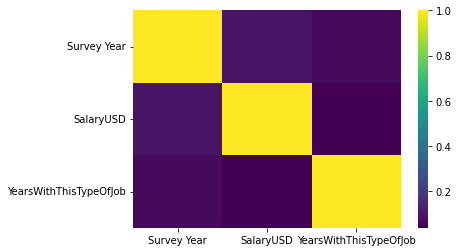

In [37]:
corr = df.corr() 
sns.heatmap(corr, cmap='viridis') # Creates a heatmap graph with configuration 'viridis'
plt.show()